# Example Graphs

## Metric 1 Death Count

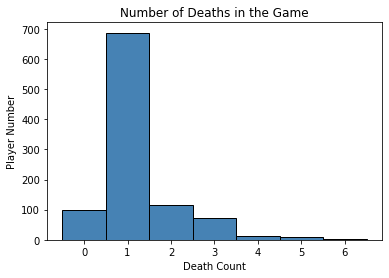

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv('data.csv') 

plt.hist(x=data.death_count,bins=np.arange(7+1)-0.5,
        color="steelblue",
        edgecolor="black")

plt.xlabel("Death Count")
plt.ylabel("Player Number")

plt.title("Number of Deaths in the Game")
plt.savefig('./death_count.png', format='png')
plt.show()


## Metric 2 Playing Time

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
game_hours=get_truncated_normal(1,1,0,3).rvs(1000)
data['game_hours']=game_hours


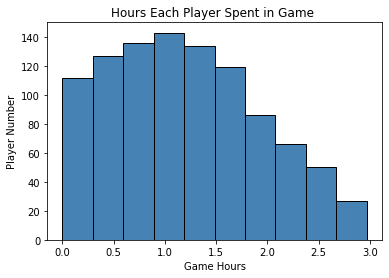

In [ ]:
plt.hist(x=data.game_hours,bins=10,
        color="steelblue",
        edgecolor="black")

plt.xlabel("Game Hours")
plt.ylabel("Player Number")

plt.title("Hours Each Player Spent in Game ")
plt.savefig('./game_hours.png', format='png')
plt.show()


# Real Data

## Connecting Database

In [23]:
!pip install pyrebase

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#pull data from database
import pyrebase
import pandas as pd
# Configure your Firebase project
config = {
  "apiKey": "YOUR_API_KEY",
  "authDomain": "lostsheeps-26b16.firebaseapp.com",
  "databaseURL": "https://lostsheeps-26b16-default-rtdb.firebaseio.com/",
  "storageBucket": "lostsheeps-26b16.appspot.com"
}

# Initialize the Pyrebase app
firebase = pyrebase.initialize_app(config)

# Get a reference to the database
db = firebase.database()

## Metric 1 Death Count

In [27]:


# Retrieve data from the database
data = db.child("deathData").get()

# Print the retrieved data
death_data=data.val()

df = pd.DataFrame(death_data)
df=df.T

In [35]:
user_death_frequency=df.groupby('userID').size().tolist()

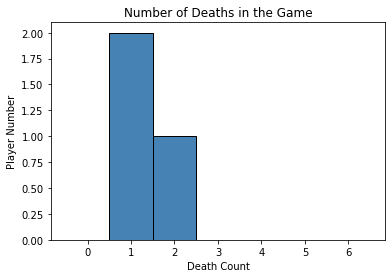

In [37]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(x=user_death_frequency,bins=np.arange(7+1)-0.5,
        color="steelblue",
        edgecolor="black")

plt.xlabel("Death Count")
plt.ylabel("Player Number")

plt.title("Number of Deaths in the Game")
plt.savefig('./death_count.png', format='png')

plt.show()

## Metric 2 Playing Time

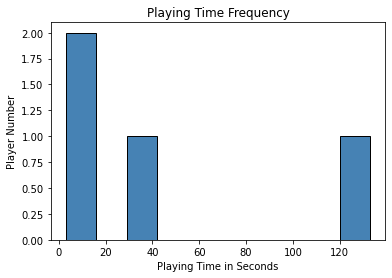

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
def strtodate(x):
  return datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
def datetosec(x):
  return x.total_seconds()
# Retrieve data from the database
data = db.child("playTime").get()

# Print the retrieved data
death_data=data.val()

df = pd.DataFrame(death_data)
df=df.T

df['playingTime']=df['end'].apply(strtodate)-df['start'].apply(strtodate)
df['playingTime']=df['playingTime'].apply(datetosec)
user_playingtime_frequency=df['playingTime'].tolist()

import matplotlib.pyplot as plt
import numpy as np
plt.hist(x=user_playingtime_frequency,bins=10,
        color="steelblue",
        edgecolor="black")

plt.xlabel("Playing Time in Seconds")
plt.ylabel("Player Number")

plt.title("Playing Time Frequency")
plt.savefig('./playing_time.png', format='png')
plt.show()